#                                         US Real Estate Data Project

Import all the packages

In [99]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
plt.style.use('ggplot')
import seaborn as sns
import cufflinks as cf
import plotly as py
%matplotlib inline
cf.go_offline()
sns.set_style('whitegrid')

Imports the .csv file from the local drive

In [2]:
df = pd.read_csv(r'D:\Python WORKBOOK\USA Real Estate Project\USA_realtor-data.csv')

In [3]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


Check the columns

In [22]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [4]:
# Check if any nulls in the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813159 entries, 0 to 813158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        813159 non-null  object 
 1   price         813088 non-null  float64
 2   bed           690360 non-null  float64
 3   bath          700599 non-null  float64
 4   acre_lot      600242 non-null  float64
 5   full_address  813159 non-null  object 
 6   street        811536 non-null  object 
 7   city          813087 non-null  object 
 8   state         813159 non-null  object 
 9   zip_code      812955 non-null  float64
 10  house_size    561288 non-null  float64
 11  sold_date     393392 non-null  object 
dtypes: float64(6), object(6)
memory usage: 74.4+ MB


In [85]:
# Check how many nulls in total of each column

df.isnull().sum()

status               0
price                0
bed             122799
bath            112560
acre_lot        212917
full_address         0
street            1623
city                72
state                0
zip_code             0
house_size      251871
sold_date       419767
dtype: int64

In [86]:
# Check if any duplicated values

df.duplicated().sum()

703662

In [88]:
# Drop duplicated values

df.drop_duplicates(inplace=True)

In [89]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,12/30/2002
734849,for_sale,169000000,6.0,9.0,0.79,"432 Park Ave Unit Penthouse, New York City, NY...",432 Park Ave Unit Penthouse,New York City,New York,10022,8255.0,NaN
734883,for_sale,135000000,5.0,6.0,NaN,"432 Park Ave Unit 79, New York, NY, 10022",432 Park Ave Unit 79,New York,New York,10022,8055.0,6/7/2016
536923,for_sale,120000000,123.0,123.0,NaN,"421 W 250th St, New York City, NY, 10471",421 W 250th St,New York City,New York,10471,NaN,6/29/2012
463024,for_sale,100000000,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820,13107.0,NaN


In [92]:
# Check again to see if any NA value after drop duplicated values

df.isnull().sum()

status              0
price               0
bed             16943
bath            15844
acre_lot        29821
full_address        0
street            494
city               22
state               0
zip_code            0
house_size      35152
sold_date       52425
dtype: int64

In [94]:
# drop NA values 

df.dropna(subset = ["bed","bath", "house_size"], inplace=True)

df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,12/30/2002
734849,for_sale,169000000,6.0,9.0,0.79,"432 Park Ave Unit Penthouse, New York City, NY...",432 Park Ave Unit Penthouse,New York City,New York,10022,8255.0,NaN
734883,for_sale,135000000,5.0,6.0,NaN,"432 Park Ave Unit 79, New York, NY, 10022",432 Park Ave Unit 79,New York,New York,10022,8055.0,6/7/2016
463024,for_sale,100000000,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820,13107.0,NaN
463025,for_sale,100000000,10.0,10.0,60.92,"19 Great Is, Darien, CT, 06820",19 Great Is,Darien,Connecticut,6820,13107.0,NaN


In [95]:
# Check again to see how many NA values after drop na values from columns of bed, bath and house size

df.isnull().sum()

status              0
price               0
bed                 0
bath                0
acre_lot        19704
full_address        0
street            304
city                6
state               0
zip_code            0
house_size          0
sold_date       31173
dtype: int64

In [96]:
# There are still NA in city, so I need to drop NA values in city

df.dropna(subset=['city'], inplace=True)
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,12/30/2002
734849,for_sale,169000000,6.0,9.0,0.79,"432 Park Ave Unit Penthouse, New York City, NY...",432 Park Ave Unit Penthouse,New York City,New York,10022,8255.0,NaN
734883,for_sale,135000000,5.0,6.0,NaN,"432 Park Ave Unit 79, New York, NY, 10022",432 Park Ave Unit 79,New York,New York,10022,8055.0,6/7/2016
463024,for_sale,100000000,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820,13107.0,NaN
463025,for_sale,100000000,10.0,10.0,60.92,"19 Great Is, Darien, CT, 06820",19 Great Is,Darien,Connecticut,6820,13107.0,NaN


In [97]:
# Check again to see if any NA values left in the columns 

df.isnull().sum()

status              0
price               0
bed                 0
bath                0
acre_lot        19702
full_address        0
street            304
city                0
state               0
zip_code            0
house_size          0
sold_date       31167
dtype: int64

In [98]:
df.shape

(71243, 12)

In [100]:
# Convert data type column of published date from object to Datetime

df['sold_date'] = pd.to_datetime(df['sold_date'])

In [101]:
df['sold_date']

572886   2002-12-30
734849          NaT
734883   2016-06-07
463024          NaT
463025          NaT
            ...    
331638          NaT
238326          NaT
575030          NaT
626366          NaT
652933          NaT
Name: sold_date, Length: 71243, dtype: datetime64[ns]

In [5]:
# All the zip_code is showing as float64, I need to change that to int64.

df['zip_code'] = df['zip_code'].fillna(0).astype('int64')
df['zip_code'] = df['zip_code'].astype('int64')

In [8]:
# Change price data type from float65 to int64. 

df['price'] = df['price'].fillna(0).astype('int64')
df['price'] = df['price'].astype('int64')

I tried only to type "df['zip_code'] = df['zip_code'].astype('int64')", but it's not working and showed error message. So, I did some research and add " df['zip_code'] = df['zip_code'].fillna(0).astype('int64')" so the type changing worked. 

In [9]:
df.dtypes

status           object
price             int64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code          int64
house_size      float64
sold_date        object
dtype: object

In [10]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601,920.0,NaN
1,for_sale,80000,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601,1527.0,NaN
2,for_sale,67000,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795,748.0,NaN
3,for_sale,145000,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731,1800.0,NaN
4,for_sale,65000,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680,NaN,NaN


In [39]:
# Count top 5 states have the most listings

df['state'].value_counts().head(5)

New Jersey       209152
Massachusetts    175248
New York         128216
Connecticut       89776
New Hampshire     51394
Name: state, dtype: int64

In [12]:
# Sort by price, with the highest price on the top of the column 

df = df.sort_values(by=['price'], inplace=False, ascending=False)

In [45]:
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,12/30/2002
734849,for_sale,169000000,6.0,9.0,0.79,"432 Park Ave Unit Penthouse, New York City, NY...",432 Park Ave Unit Penthouse,New York City,New York,10022,8255.0,NaN
734883,for_sale,135000000,5.0,6.0,NaN,"432 Park Ave Unit 79, New York, NY, 10022",432 Park Ave Unit 79,New York,New York,10022,8055.0,6/7/2016
536923,for_sale,120000000,123.0,123.0,NaN,"421 W 250th St, New York City, NY, 10471",421 W 250th St,New York City,New York,10471,NaN,6/29/2012
463024,for_sale,100000000,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820,13107.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
644206,ready_to_build,0,2.0,NaN,NaN,"4300 Bridgeboro Road, Moorestown, NJ, 08057",4300 Bridgeboro Road,Moorestown,New Jersey,8057,1865.0,NaN
525331,for_sale,0,NaN,NaN,0.17,"535 E 29th St, Paterson, NJ, 07504",535 E 29th St,Paterson,New Jersey,7504,4500.0,NaN
525336,for_sale,0,NaN,NaN,0.22,"541 E 29th St, Paterson, NJ, 07504",541 E 29th St,Paterson,New Jersey,7504,5000.0,NaN
654523,ready_to_build,0,3.0,NaN,NaN,"Levis Drive & S Martin Ave, Mount Holly, NJ, 0...",Levis Drive & S Martin Ave,Mount Holly,New Jersey,8060,2208.0,NaN


C:\Users\lyao1\anaconda3\envs\fluffy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



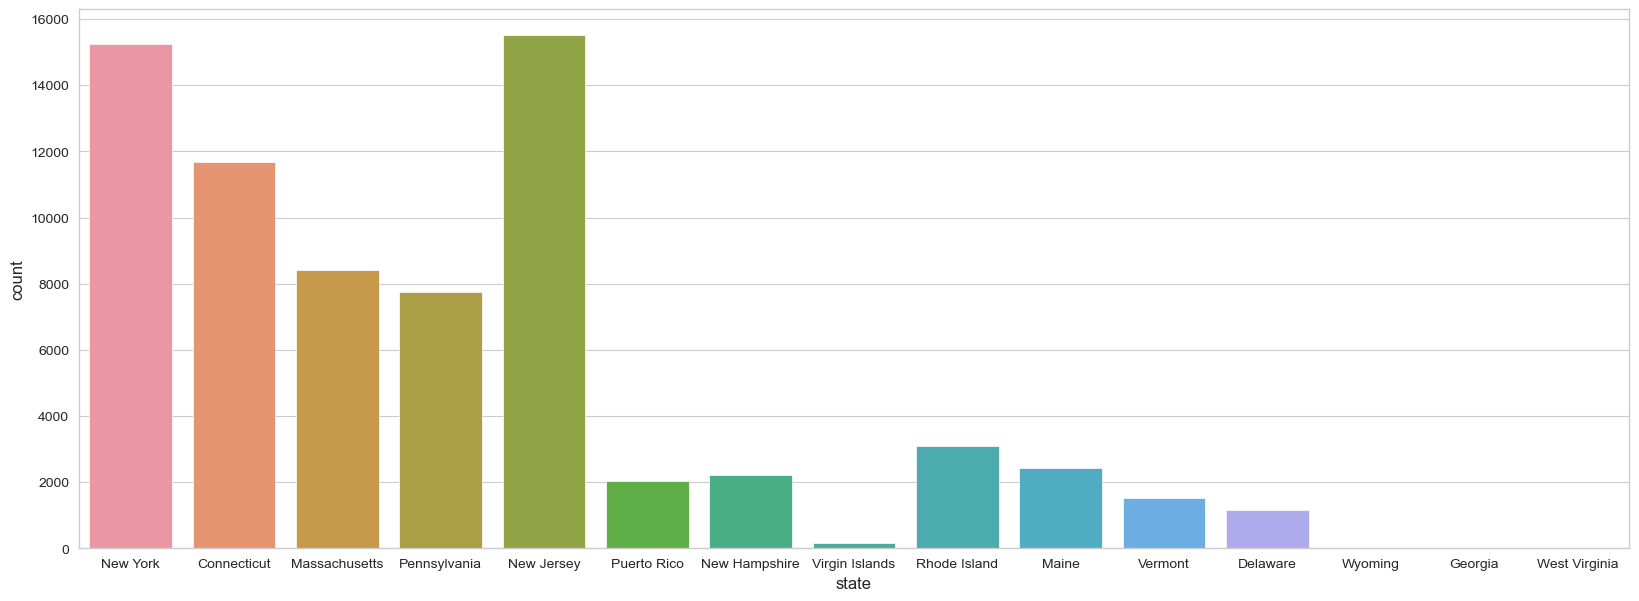

In [106]:
# How many listings vs the states of the US 

plt.figure(figsize = (20,7))
sns.countplot(df['state'])
plt.show()

<AxesSubplot:xlabel='sold_date', ylabel='price'>

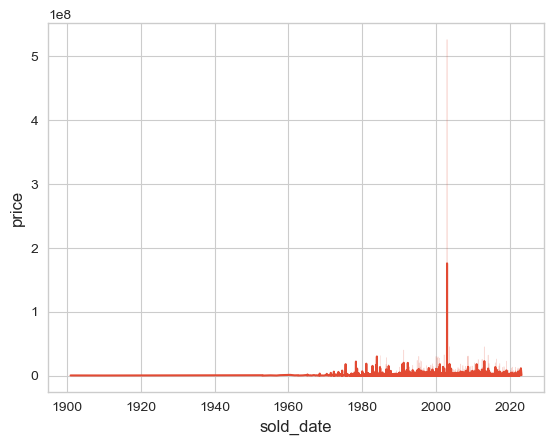

In [107]:
# The price change by the years

sns.lineplot(data=df, x='sold_date', y='price')

Text(0.5, 1.0, 'The Relationship Between Price and Numbers of Bedroom')

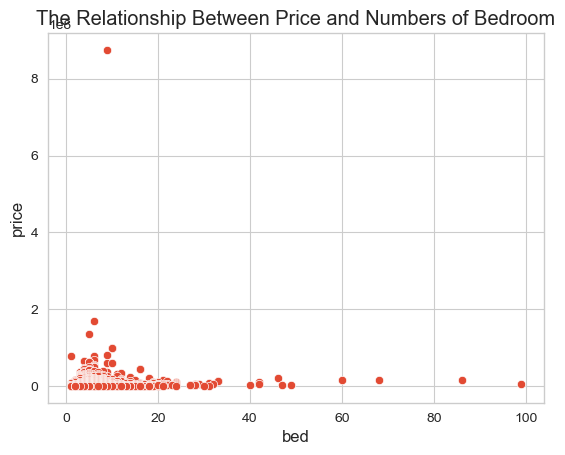

In [160]:
# Show the relationship between price and numbers of bedrooms

sns.scatterplot(data=df,x='bed', y='price')
plt.title("The Relationship Between Price and Numbers of Bedroom")

Text(0.5, 1.0, 'The Relationship Between Price and Numbers of Bathroom')

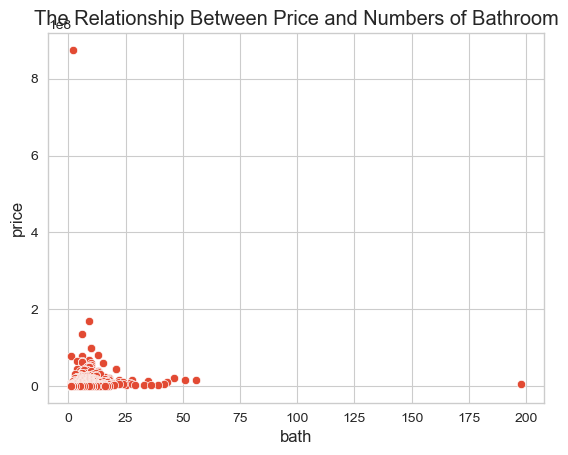

In [161]:
# Show the relationship between price and numbers of bathrooms

sns.scatterplot(data=df,x='bath', y='price')
plt.title("The Relationship Between Price and Numbers of Bathroom")

Text(0.5, 1.0, 'The Relationship Between Price and House Size')

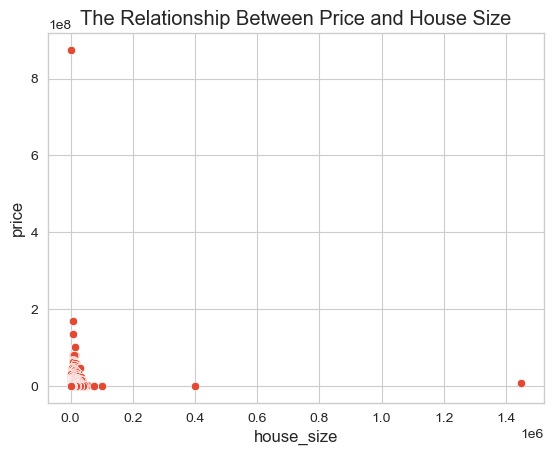

In [162]:
# Show the relationship between price and house size

sns.scatterplot(data=df,x='house_size', y='price')
plt.title("The Relationship Between Price and House Size")

In [118]:
df.sort_values(by='house_size', ascending=False).head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
10328,for_sale,8250000,5.0,6.0,33.29,"PR-250 Int, Culebra, PR, 00775",PR-250 Int,Culebra,Puerto Rico,775,1450112.0,NaT
479983,for_sale,489999,6.0,3.0,0.10,"814 Cleveland Ave Unit 2, Linden, NJ, 07036",814 Cleveland Ave Unit 2,Linden,New Jersey,7036,400149.0,NaT
130253,for_sale,309900,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844,99999.0,2022-01-12
656823,for_sale,54000,1.0,1.0,NaN,"5720 Wissahickon Ave Apt E18, Philadelphia, PA...",5720 Wissahickon Ave Apt E18,Philadelphia,Pennsylvania,19144,74340.0,NaT
678653,for_sale,169000,3.0,1.0,0.02,"3630 Winchester Ave, Atlantic City, NJ, 08401",3630 Winchester Ave,Atlantic City,New Jersey,8401,70626.0,2017-12-27
593235,for_sale,1250000,6.0,5.0,1.21,"639 Pawnee Ln, Franklin Lakes, NJ, 07417",639 Pawnee Ln,Franklin Lakes,New Jersey,7417,52708.0,2018-08-07
14172,for_sale,499000,4.0,2.0,1.25,"162 Estate Carlton, Frederiksted, VI, 00840",162 Estate Carlton,Frederiksted,Virgin Islands,840,49658.0,NaT
532965,for_sale,1398000,4.0,3.0,1.10,"150 Leroy St, Tenafly, NJ, 07670",150 Leroy St,Tenafly,New Jersey,7670,47916.0,NaT
535446,for_sale,589900,3.0,3.0,1.05,"16 Ballantine Woods Way, Andover, NJ, 07821",16 Ballantine Woods Way,Andover,New Jersey,7821,45955.0,NaT
606630,for_sale,329000,4.0,3.0,1.03,"1653 Brookdale Dr, Bridgewater Twp, NJ, 08836",1653 Brookdale Dr,Bridgewater Twp,New Jersey,8836,44879.0,NaT


In [119]:
df.sort_values(by='bed', ascending=False).head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
149025,for_sale,5300000,99.0,198.0,0.29,"6 Jefferson St Apt 12, Winthrop, MA, 02152",6 Jefferson St Apt 12,Winthrop,Massachusetts,2152,14462.0,NaT
184836,for_sale,15150000,86.0,56.0,1.32,"77-79 and 93 Arlington St, Framingham, MA, 01702",77-79 and 93 Arlington St,Framingham,Massachusetts,1702,35666.0,NaT
510130,for_sale,15000000,68.0,28.0,NaN,"1721 E 8th St Unit 27UNITS, New York City, NY,...",1721 E 8th St Unit 27UNITS,New York City,New York,11223,20700.0,NaT
181859,for_sale,14950000,60.0,51.0,1.01,"8 Banton St, Boston, MA, 02124",8 Banton St,Boston,Massachusetts,2124,38442.0,NaT
237963,for_sale,2000000,49.0,15.0,0.38,"254-276 Fourth St, Fall River, MA, 02721",254-276 Fourth St,Fall River,Massachusetts,2721,15989.0,NaT
674558,for_sale,1399000,47.0,39.0,0.32,"121-123 W Roberts Ave, Wildwood, NJ, 08260",121-123 W Roberts Ave,Wildwood,New Jersey,8260,14000.0,2022-04-15
557920,for_sale,19995000,46.0,46.0,NaN,"73 E 3rd St Unit Apt, New York City, NY, 10003",73 E 3rd St Unit Apt,New York City,New York,10003,22071.0,NaT
157500,for_sale,4999000,42.0,42.0,0.23,"13 Warwick St, Somerville, MA, 02145",13 Warwick St,Somerville,Massachusetts,2145,26942.0,NaT
722035,for_sale,11200000,42.0,43.0,0.83,"646-662 Port Richmond Ave, Staten Island, NY, ...",646-662 Port Richmond Ave,Staten Island,New York,10302,27152.0,NaT
64701,for_sale,2850000,40.0,36.0,1.78,"1-7 Church St, Claverack, NY, 12565",1-7 Church St,Claverack,New York,12565,27443.0,NaT


In [ ]:
# To add latitude and longitude, I download this table from "https://www.kaggle.com/datasets/qusaybtoush1990/usa-latitude-and-longitude", 
# the name of the file is USA-latlon.csv

lat_df = pd.read_csv(r'D:\Python WORKBOOK\USA Real Estate Project\USA-latlon.csv')

In [164]:
lat_df.head(10)

,zip_code,latitude,longitude
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
5,612,18.402253,-66.711397
6,616,18.420412,-66.671979
7,617,18.445147,-66.559696
8,622,17.991245,-67.153993
9,623,18.083361,-67.153897


In [132]:
# Now merge the lat_df inot the data frame with zip code

df = pd.merge(df, lat_df, how='inner', left_on=['zip_code'], right_on=['zip_code'])

df.head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,latitude,longitude
0,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,2002-12-30,40.862543,-73.888143
1,for_sale,995000,10.0,5.0,NaN,"2846 Marion Ave, Bronx, NY, 10458",2846 Marion Ave,Bronx,New York,10458,2568.0,2017-01-27,40.862543,-73.888143
2,for_sale,879000,7.0,4.0,0.05,"2306 Bassford Ave, Bronx, NY, 10458",2306 Bassford Ave,Bronx,New York,10458,3374.0,2020-10-23,40.862543,-73.888143
3,for_sale,799000,10.0,5.0,0.06,"2578 Marion Ave, Bronx, NY, 10458",2578 Marion Ave,Bronx,New York,10458,3625.0,2018-07-25,40.862543,-73.888143
4,for_sale,795000,7.0,4.0,0.05,"2503 Marion Ave, Bronx, NY, 10458",2503 Marion Ave,Bronx,New York,10458,2500.0,2019-06-27,40.862543,-73.888143
5,for_sale,729900,8.0,4.0,0.07,"2774 Bainbridge Ave, Bronx, NY, 10458",2774 Bainbridge Ave,Bronx,New York,10458,1700.0,2011-05-27,40.862543,-73.888143
6,for_sale,725000,4.0,4.0,NaN,"2336 Valentine Ave, Bronx, NY, 10458",2336 Valentine Ave,Bronx,New York,10458,1776.0,2015-09-30,40.862543,-73.888143
7,for_sale,675000,5.0,3.0,0.04,"2781 Marion Ave, Bronx, NY, 10458",2781 Marion Ave,Bronx,New York,10458,2226.0,2018-07-25,40.862543,-73.888143
8,for_sale,650000,7.0,3.0,0.08,"321 E 196th St, Bronx, NY, 10458",321 E 196th St,Bronx,New York,10458,1810.0,1988-12-12,40.862543,-73.888143
9,for_sale,625000,3.0,1.0,0.06,"367 E 187th St, New York, NY, 10458",367 E 187th St,New York,New York,10458,1920.0,NaT,40.862543,-73.888143


The geopandas and Shapely library were unable to be installed or imported into the Jupyter Notebook, so I would just simply skip geo plot for this project and focus on the original data. 

In [167]:
df.drop(['latitude ','longitude '],axis=1,inplace=True)
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,875000000,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,2002-12-30
1,for_sale,995000,10.0,5.0,NaN,"2846 Marion Ave, Bronx, NY, 10458",2846 Marion Ave,Bronx,New York,10458,2568.0,2017-01-27
2,for_sale,879000,7.0,4.0,0.05,"2306 Bassford Ave, Bronx, NY, 10458",2306 Bassford Ave,Bronx,New York,10458,3374.0,2020-10-23
3,for_sale,799000,10.0,5.0,0.06,"2578 Marion Ave, Bronx, NY, 10458",2578 Marion Ave,Bronx,New York,10458,3625.0,2018-07-25
4,for_sale,795000,7.0,4.0,0.05,"2503 Marion Ave, Bronx, NY, 10458",2503 Marion Ave,Bronx,New York,10458,2500.0,2019-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...
71123,for_sale,65000,2.0,2.0,NaN,"140 Chestnut St Apt 406, Springfield, MA, 01103",140 Chestnut St Apt 406,Springfield,Massachusetts,1103,1050.0,2006-05-26
71124,for_sale,62500,4.0,2.0,0.17,"21 Auction St, Wyoming, WV, 24898",21 Auction St,Wyoming,West Virginia,24898,1860.0,NaT
71125,for_sale,59000,3.0,1.0,0.45,"748 Spruce Head Rd, Saint George, ME, 04859",748 Spruce Head Rd,Saint George,Maine,4859,924.0,NaT
71126,for_sale,50000,2.0,1.0,0.10,"3701 N Delaware Dr, Easton, PA, 18040",3701 N Delaware Dr,Easton,Pennsylvania,18040,1128.0,2003-09-24


<AxesSubplot:xlabel='state'>

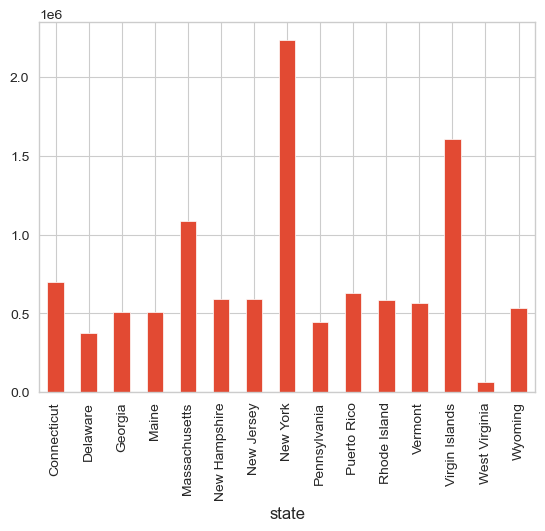

In [168]:
# Make Group by city

df.groupby('state')['price'].mean().plot(kind='bar')

In [169]:
# The median price of the US real estate market #

median_prices = df['price'].median()
median_prices

459000.0

In [170]:
# Group by states

By_state = df.groupby('state')

In [171]:
# Mean values of each state

By_state.mean()

,price,bed,bath,acre_lot,zip_code,house_size
state,,,,,,
Connecticut,6.995734e+05,3.474816,2.710810,15.923341,6479.941323,2178.603478
Delaware,3.761371e+05,3.283362,2.437608,1.959280,19765.463605,2099.792028
Georgia,5.071912e+05,5.000000,3.500000,NaN,30228.000000,3388.500000
Maine,5.073637e+05,3.414104,2.295613,14.245438,4435.863469,2067.125051
Massachusetts,1.084986e+06,3.519473,2.704464,3.436306,2035.990857,2270.797435
New Hampshire,5.921454e+05,3.143050,2.443545,4.820060,3437.085020,2168.598291
New Jersey,5.895423e+05,3.386683,2.561944,16.132091,8121.747583,2326.176421
New York,2.234910e+06,2.975716,2.536295,20.169320,10740.839158,1935.377887
Pennsylvania,4.429124e+05,3.179804,2.283359,0.549055,19056.425683,1830.462133


In [172]:
# The maximum values of each state 

By_state.max()

C:\Users\lyao1\AppData\Local\Temp\ipykernel_16660\175905385.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



,status,price,bed,bath,acre_lot,full_address,city,zip_code,house_size,sold_date
state,,,,,,,,,,
Connecticut,for_sale,100000000,23.0,25.0,99999.00,"Yorktown Rdg Unit 46, Waterbury, CT, 06704",Woodstock,6907,25000.0,2022-03-03
Delaware,for_sale,3950000,9.0,10.0,700.02,"Wilmington, DE, 19801",Wilmington,19977,11725.0,2022-03-24
Georgia,for_sale,531625,5.0,4.0,NaN,"1617 Bernard Ct Unit 129, Hampton, GA, 30228",Hampton,30228,3661.0,2022-10-31
Maine,for_sale,9000000,30.0,17.0,13697.00,"Wildwood Ln, Biddeford, ME, 04005",York,4989,35388.0,2022-03-04
Massachusetts,for_sale,30000000,99.0,198.0,9035.00,"Zero Worcester Sq Unit TH1, Boston, MA, 02118",Yarmouth Port,2893,99999.0,2022-12-01
New Hampshire,for_sale,19500000,16.0,16.0,600.00,"Unit 7 Silvergrass Pl Unit 7, Hampton, NH, 03842",Woodstock,3894,20504.0,2022-03-02
New Jersey,for_sale,24900000,47.0,39.0,96120.00,"Wyckoff, NJ, 07481",Wyckoff,10303,400149.0,2023-03-01
New York,for_sale,875000000,68.0,46.0,100000.00,"Witthoff St, Queens Village, NY, 11429",Yulan,14534,40720.0,2022-07-01
Pennsylvania,for_sale,29900000,22.0,17.0,1088.61,"W 6th St Lot 2-115, Media, PA, 19063",Yeadon,19462,74340.0,2022-03-31


In [173]:
By_state.min()

C:\Users\lyao1\AppData\Local\Temp\ipykernel_16660\1740260404.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.



,status,price,bed,bath,acre_lot,full_address,city,zip_code,house_size,sold_date
state,,,,,,,,,,
Connecticut,for_sale,20000,1.0,1.0,0.02,"0-1 New Rd, Thompson, CT, 06277",Andover,6001,100.0,1963-02-23
Delaware,for_sale,21497,1.0,1.0,0.01,"00002 Vivaldi Dr, Middletown, DE, 19709",Bear,19701,440.0,1972-10-01
Georgia,for_sale,481705,5.0,3.0,NaN,"1604 Bernard Ct Unit 123, Hampton, GA, 30228",Hampton,30228,3116.0,2022-07-20
Maine,for_sale,10000,1.0,1.0,0.01,"1 Bay Field Rd, Woolwich, ME, 04579",Abbot,3901,224.0,1980-01-29
Massachusetts,for_sale,10000,1.0,1.0,0.00,"0 Grimes Ln Lot 8A, Littleton, MA, 01460",Abington,1001,170.0,1901-01-01
New Hampshire,for_sale,7500,1.0,1.0,0.01,"0 Thistlewood Dr Lot 10-351, Pelham, NH, 03076",Acworth,3031,320.0,1986-09-11
New Jersey,for_sale,500,1.0,1.0,0.00,"0 New St, Crosswicks, NJ, 08515",Aberdeen,7001,165.0,1953-01-02
New York,for_sale,10000,1.0,1.0,0.00,"1 Antonelli Dr, Port Jefferson Station, NY, 11776",Accord,6390,122.0,1971-03-24
Pennsylvania,for_sale,15000,1.0,1.0,0.00,"002 Old Frg, Media, PA, 19063",Abington,8402,100.0,1956-10-25


In [174]:
By_state.std()

,price,bed,bath,acre_lot,zip_code,house_size
state,,,,,,
Connecticut,1.998652e+06,1.520896,1.524513,1055.762444,286.224875,1543.821926
Delaware,2.913384e+05,0.891485,1.037881,31.124157,62.657794,1132.320012
Georgia,2.489368e+04,0.000000,0.577350,NaN,0.000000,314.655897
Maine,6.864435e+05,1.827211,1.373287,303.469648,327.503126,1738.250428
Massachusetts,1.656180e+06,2.704246,2.865745,118.652544,495.182397,2078.837173
New Hampshire,9.091263e+05,1.353149,1.226886,21.236216,316.612376,1462.181287
New Jersey,7.635536e+05,1.388344,1.337829,905.446845,518.195755,4263.867147
New York,8.426070e+06,2.098785,1.778151,1236.342749,758.525101,1750.444091
Pennsylvania,6.556099e+05,1.144072,1.211638,13.810978,249.305119,1510.862982


In [175]:
By_state.describe()

price                                                   \
                  count          mean           std       min        25%   
state                                                                      
Connecticut     11674.0  6.995734e+05  1.998652e+06   20000.0  245000.00   
Delaware         1154.0  3.761371e+05  2.913384e+05   21497.0  218250.00   
Georgia             4.0  5.071912e+05  2.489368e+04  481705.0  488095.00   
Maine            2439.0  5.073637e+05  6.864435e+05   10000.0  190000.00   
Massachusetts    8422.0  1.084986e+06  1.656180e+06   10000.0  425000.00   
New Hampshire    2223.0  5.921454e+05  9.091263e+05    7500.0  295000.00   
New Jersey      15514.0  5.895423e+05  7.635536e+05     500.0  264999.00   
New York        15195.0  2.234910e+06  8.426070e+06   10000.0  538000.00   
Pennsylvania     7764.0  4.429124e+05  6.556099e+05   15000.0  204974.25   
Puerto Rico      2016.0  6.322835e+05  1.690880e+06   18000.0   99000.00   
Rhode Island     3082.0  5.826164e+05  7.132701e+05    5500.0  305000.00   
Vermont          1491.0  5.683497e+05  6.914839e+05    5995.0  220000.00   
Virgin Islands    148.0  1.608523e+06  2.085608e+06  100000.0  388750.00   
West Virginia       1.0  6.250000e+04           NaN   62500.0   62500.00   
Wyoming             1.0  5.350000e+05           NaN  535000.0  535000.00   

                                                       bed            ...  \
                     50%         75%          max    count      mean  ...   
state                                                                 ...   
Connecticut     369000.0   608633.75  100000000.0  11674.0  3.474816  ...   
Delaware        324900.0   463525.00    3950000.0   1154.0  3.283362  ...   
Georgia         507717.5   526813.75     531625.0      4.0  5.000000  ...   
Maine           340000.0   559950.00    9000000.0   2439.0  3.414104  ...   
Massachusetts   649000.0  1000000.00   30000000.0   8422.0  3.519473  ...   
New Hampshire   449000.0   649900.00   19500000.0   2223.0  3.143050  ...   
New Jersey      399900.0   649900.00   24900000.0  15514.0  3.386683  ...   
New York        925000.0  1995000.00  875000000.0  15195.0  2.975716  ...   
Pennsylvania    305000.0   485000.00   29900000.0   7764.0  3.179804  ...   
Puerto Rico     169000.0   450000.00   19950000.0   2016.0  3.623016  ...   
Rhode Island    399900.0   599000.00   14000000.0   3082.0  3.504218  ...   
Vermont         374000.0   642000.00    8000000.0   1491.0  3.487592  ...   
Virgin Islands  949500.0  2000000.00   16999000.0    148.0  3.581081  ...   
West Virginia    62500.0    62500.00      62500.0      1.0  4.000000  ...   
Wyoming         535000.0   535000.00     535000.0      1.0  3.000000  ...   

               zip_code          house_size                             \
                    75%      max      count         mean           std   
state                                                                    
Connecticut      6776.0   6907.0    11674.0  2178.603478   1543.821926   
Delaware        19805.0  19977.0     1154.0  2099.792028   1132.320012   
Georgia         30228.0  30228.0        4.0  3388.500000    314.655897   
Maine            4736.0   4989.0     2439.0  2067.125051   1738.250428   
Massachusetts    2466.0   2893.0     8422.0  2270.797435   2078.837173   
New Hampshire    3811.0   3894.0     2223.0  2168.598291   1462.181287   
New Jersey       8541.5  10303.0    15514.0  2326.176421   4263.867147   
New York        11223.0  14534.0    15195.0  1935.377887   1750.444091   
Pennsylvania    19142.0  19462.0     7764.0  1830.462133   1510.862982   
Puerto Rico       926.0    987.0     2016.0  2747.452381  32311.813359   
Rhode Island     2905.0   2921.0     3082.0  2137.103180   1458.371182   
Vermont          5743.0  95652.0     1491.0  2331.564722   1594.920097   
Virgin Islands    830.0    850.0      148.0  4151.155405   5158.745996   
West Virginia   24898.0  24898.0        1.0  1860.000000           NaN   
Wyom

In [176]:
By_state.describe().transpose()

state              Connecticut      Delaware        Georgia         Maine  \
price      count  1.167400e+04  1.154000e+03       4.000000  2.439000e+03   
           mean   6.995734e+05  3.761371e+05  507191.250000  5.073637e+05   
           std    1.998652e+06  2.913384e+05   24893.681051  6.864435e+05   
           min    2.000000e+04  2.149700e+04  481705.000000  1.000000e+04   
           25%    2.450000e+05  2.182500e+05  488095.000000  1.900000e+05   
           50%    3.690000e+05  3.249000e+05  507717.500000  3.400000e+05   
           75%    6.086338e+05  4.635250e+05  526813.750000  5.599500e+05   
           max    1.000000e+08  3.950000e+06  531625.000000  9.000000e+06   
bed        count  1.167400e+04  1.154000e+03       4.000000  2.439000e+03   
           mean   3.474816e+00  3.283362e+00       5.000000  3.414104e+00   
           std    1.520896e+00  8.914845e-01       0.000000  1.827211e+00   
           min    1.000000e+00  1.000000e+00       5.000000  1.000000e+00   
           25%    3.000000e+00  3.000000e+00       5.000000  3.000000e+00   
           50%    3.000000e+00  3.000000e+00       5.000000  3.000000e+00   
           75%    4.000000e+00  4.000000e+00       5.000000  4.000000e+00   
           max    2.300000e+01  9.000000e+00       5.000000  3.000000e+01   
bath       count  1.167400e+04  1.154000e+03       4.000000  2.439000e+03   
           mean   2.710810e+00  2.437608e+00       3.500000  2.295613e+00   
           std    1.524513e+00  1.037881e+00       0.577350  1.373287e+00   
           min    1.000000e+00  1.000000e+00       3.000000  1.000000e+00   
           25%    2.000000e+00  2.000000e+00       3.000000  1.000000e+00   
           50%    2.000000e+00  2.000000e+00       3.500000  2.000000e+00   
           75%    3.000000e+00  3.000000e+00       4.000000  3.000000e+00   
           max    2.500000e+01  1.000000e+01       4.000000  1.700000e+01   
acre_lot   count  9.241000e+03  1.041000e+03       0.000000  2.273000e+03   
           mean   1.592334e+01  1.959280e+00            NaN  1.424544e+01   
           std    1.055762e+03  3.112416e+01            NaN  3.034696e+02   
           min    2.000000e-02  1.000000e-02            NaN  1.000000e-02   
           25%    2.000000e-01  6.000000e-02            NaN  3.400000e-01   
           50%    4.400000e-01  1.500000e-01            NaN  1.000000e+00   
           75%    1.160000e+00  2.500000e-01            NaN  2.850000e+00   
           max    9.999900e+04  7.000200e+02            NaN  1.369700e+04   
zip_code   count  1.167400e+04  1.154000e+03       4.000000  2.439000e+03   
           mean   6.479941e+03  1.976546e+04   30228.000000  4.435863e+03   
           std    2.862249e+02  6.265779e+01       0.000000  3.275031e+02   
           min    6.001000e+03  1.970100e+04   30228.000000  3.901000e+03   
           25%    6.250000e+03  1.970900e+04   30228.000000  4.096000e+03   
           50%    6.477000e+03  1.980100e+04   30228.000000  4.424000e+03   
           75%    6.776000e+03  1.980500e+04   30228.000000  4.736000e+03   
           max    6.907000e+03  1.997700e+04   30228.000000  4.989000e+03   
house_size count  1.167400e+04  1.154000e+03       4.000000  2.439000e+03   
           mean   2.178603e+03  2.099792e+03    3388.500000  2.067125e+03   
           std    1.543822e+03  1.132320e+03     314.655897  1.738250e+03   
           min    1.000000e+02  4.400000e+02    3116.000000  2.240000e+02   
           25%    1.260000e+03  1.300000e+03    3116.000000  1.198000e+03   
           50%    1.757000e+03  1.875000e+03    3388.500000  1.686000e+03   
           75%    2.600000e+03  2.496500e+03    3661.000000  2.413000e+03   
           max    2.500000e+04  1.172500e+04    3661.000000  3.538800e+04   

state             Massachusetts  New Hampshire    New Jersey      New York  \
price      count   8.422000e+03   2.223000e+03  1.551400e+04  1.519500e+04   
           mean    1.084986e+06   5.921454e+05  5.895423e+05  2.234910

In [177]:
df2 = df['state'].value_counts()
df2

New Jersey        15514
New York          15195
Connecticut       11674
Massachusetts      8422
Pennsylvania       7764
Rhode Island       3082
Maine              2439
New Hampshire      2223
Puerto Rico        2016
Vermont            1491
Delaware           1154
Virgin Islands      148
Georgia               4
Wyoming               1
West Virginia         1
Name: state, dtype: int64

The correlations between the price, bedroom, bathroom, lot size and house size. 

In [178]:
df.corr()

,price,bed,bath,acre_lot,zip_code,house_size
price,1.000000,0.122606,0.228612,-0.000820,0.003584,0.072989
bed,0.122606,1.000000,0.696035,-0.005384,-0.066583,0.184802
bath,0.228612,0.696035,1.000000,-0.001018,-0.049955,0.203633
acre_lot,-0.000820,-0.005384,-0.001018,1.000000,-0.003600,-0.000303
zip_code,0.003584,-0.066583,-0.049955,-0.003600,1.000000,-0.026109
house_size,0.072989,0.184802,0.203633,-0.000303,-0.026109,1.000000


<AxesSubplot:>

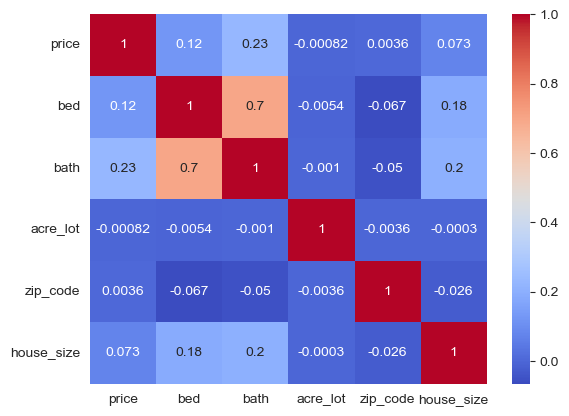

In [179]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

End of project. Thank you!